In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [0]:
!wget --no-check-certificate https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip  -O /tmp/cats_and_dogs_filtered.zip

--2019-04-12 13:25:15--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.141.128, 2607:f8b0:400c:c06::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.141.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   180MB/s    in 0.4s    

2019-04-12 13:25:15 (180 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip, 'r')
zip_.extractall(path='/tmp')
zip_.close()

In [0]:
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


In [0]:
validation_dogs_dir

'/tmp/cats_and_dogs_filtered/validation/dogs'

In [0]:
def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir( item_dir )
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:top]

  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5, 5, idx+1)
  
    img = mpimg.imread(img_path)
    plt.imshow(img)
  
  plt.tight_layout()


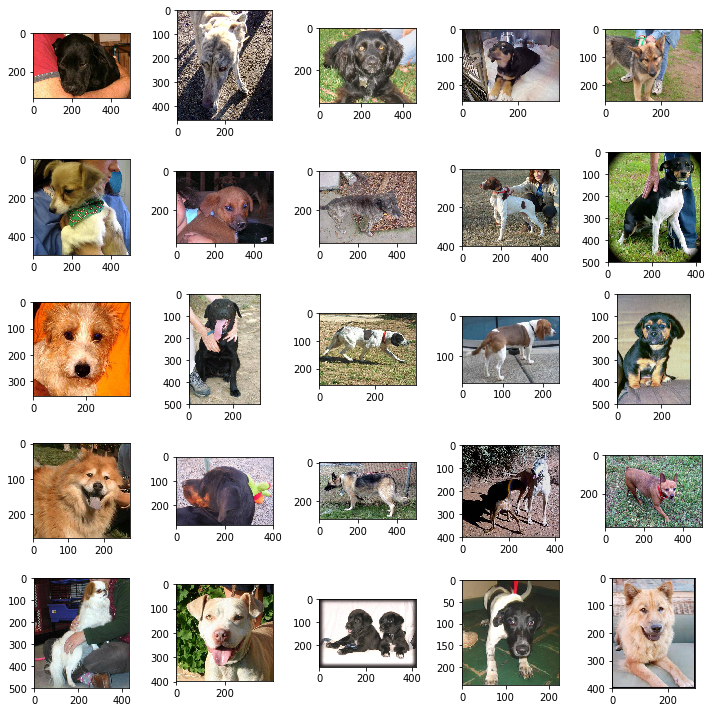

In [0]:
plot_images(train_dogs_dir)


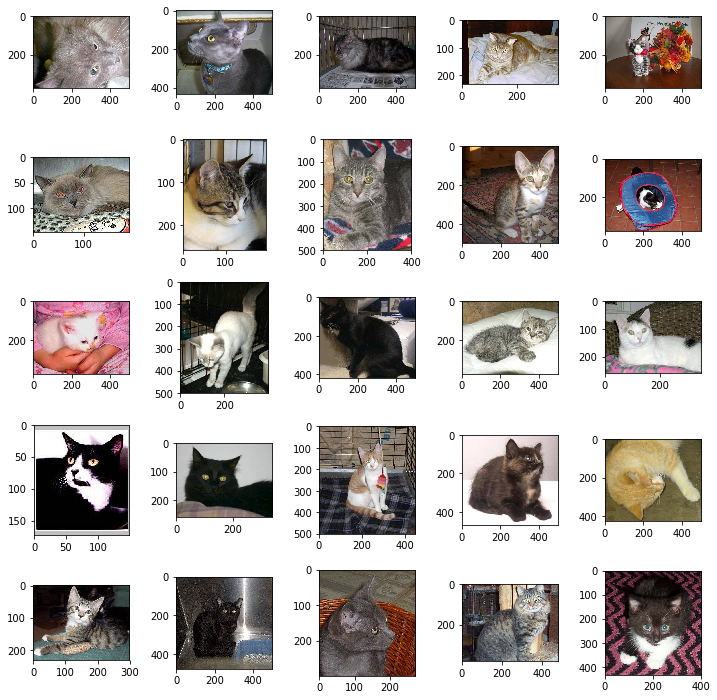

In [0]:
plot_images(train_cats_dir)

In [0]:
input_shape = (150, 150, 3)

model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)             0         
__________

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=5,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)


Epoch 1/5
50/50 [==============================] - 18s 359ms/step - loss: 0.6928 - acc: 0.4960
 - 125s - loss: 0.7023 - acc: 0.5120 - val_loss: 0.6928 - val_acc: 0.4960
Epoch 2/5
50/50 [==============================] - 18s 362ms/step - loss: 0.6905 - acc: 0.5180
 - 123s - loss: 0.6940 - acc: 0.5125 - val_loss: 0.6905 - val_acc: 0.5180
Epoch 3/5
50/50 [==============================] - 18s 359ms/step - loss: 0.6887 - acc: 0.5660
 - 124s - loss: 0.6938 - acc: 0.5460 - val_loss: 0.6887 - val_acc: 0.5660
Epoch 4/5
50/50 [==============================] - 18s 361ms/step - loss: 0.6810 - acc: 0.5930
 - 124s - loss: 0.6683 - acc: 0.6065 - val_loss: 0.6810 - val_acc: 0.5930
Epoch 5/5
50/50 [==============================] - 18s 364ms/step - loss: 0.6694 - acc: 0.6320
 - 123s - loss: 0.6242 - acc: 0.6570 - val_loss: 0.6694 - val_acc: 0.6320
